# Azcorra 2023 demo

This tutorial demonstrates how to access an NWB file from the Azcorra 2023 dataset using `pynwb`.

This session contains fiber photometry recordings from head-fixed mice running on a treadmill while receiving rewards and aversive air puffs in order to analyze differences or similarities in functional responses of different subtypes of striatonigral dopamine neurons.



# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [87]:
from pynwb import NWBHDF5IO

# The file path to a .nwb file
nwbfile_path = "/Volumes/LaCie/CN_GCP/Dombeck/Azcorra2023_nwbfiles/VGlut-A997-20200129-0002.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

root pynwb.file.NWBFile at 0x13420705808
Fields:
  acquisition: {
    FiberPhotometryResponseSeriesGreenFiber1 <class 'abc.FiberPhotometryResponseSeries'>,
    FiberPhotometryResponseSeriesGreenIsosbesticFiber1 <class 'abc.FiberPhotometryResponseSeries'>,
    FluorescenceFiber1 <class 'pynwb.base.TimeSeries'>,
    PicoScopeEventTypes <class 'abc.EventTypesTable'>,
    PicoScopeEvents <class 'abc.EventsTable'>,
    TtlTypesTable <class 'abc.TtlTypesTable'>,
    TtlsTable <class 'abc.TtlsTable'>,
    Velocity <class 'pynwb.base.TimeSeries'>
  }
  analysis: {
    EventTypes <class 'abc.EventTypesTable'>,
    Events <class 'abc.EventsTable'>
  }
  devices: {
    DichroicMirrorGreen <class 'abc.DichroicMirror'>,
    EmissionFilterGreen <class 'abc.BandOpticalFilter'>,
    ExcitationSource405 <class 'abc.ExcitationSource'>,
    ExcitationSource470 <class 'abc.ExcitationSource'>,
    Fiber1 <class 'abc.OpticalFiber'>,
    GCaMP6f <class 'abc.Indicator'>,
    OpticalFilter405 <class 'abc.BandOpticalFilter'>,
    OpticalFilter470 <class 'abc.BandOpticalFilter'>,
    PhotodetectorPMT <class 'abc.Photodetector'>
  }
  experiment_description: Dopamine neurons are characterized by their response to unexpected rewards, but they also fire during movement and
aversive stimuli. Dopamine neuron diversity has been observed based on molecular expression profiles; however,
whether different functions map onto such genetic subtypes remains unclear. In this study, we established that
three genetic dopamine neuron subtypes within the substantia nigra pars compacta, characterized by the expression
of Slc17a6 (Vglut2), Calb1 and Anxa1, each have a unique set of responses to rewards, aversive stimuli and
accelerations and decelerations, and these signaling patterns are highly correlated between somas and axons within
subtypes. Remarkably, reward responses were almost entirely absent in the Anxa1+ subtype, which instead displayed
acceleration-correlated signaling. Our findings establish a connection between functional and genetic dopamine
neuron subtypes and demonstrate that molecular expression patterns can serve as a common framework to dissect
dopaminergic functions.

  experimenter: ['Azcorra, Maite']
  file_create_date: [datetime.datetime(2024, 5, 21, 15, 28, 16, 736941, tzinfo=tzoffset(None, 7200))]
  identifier: c2af52dd-1954-4738-bca4-a5f9f343bbb2
  institution: Northwestern University
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Dombeck
  lab_meta_data: {
    FiberPhotometry <class 'abc.FiberPhotometry'>
  }
  pharmacology: Adult mice (postnatal 2–4 months old) were anesthetized with isoflurane (1–2%), and a 0.5–1-mm-diameter craniotomy
was made over the right substantia nigra (−3.25 mm caudal, +1.55 mm lateral from bregma).
A small volume (0.4 μl total) of virus (AAV8-EF1α-CreOn/FlpOn-GCaMP6f (RRID:Addgene_137122, titer 6.10 × 1013)
for Aldh1a1-iCre/Th-Flpo, Vglut2-IRES-Cre/Th-Flpo and Calb1-IRES2-Cre/Th-Flpo mice or AAV1-CAG-FLEX-GCaMP6f
(RRID:Addgene_100835, titer 2.00 × 1013) for DAT-Cre or Anxa1-iCre mice), diluted 1:1 in PBS, was pressure injected
through a pulled glass micropipette into the SNc at four depths (−3.8, −4.1, −4.4 and −4.7 mm ventral from dura
surface, 0.1 μl per depth). After the injections, the skull and craniotomy were sealed with Metabond (Parkell),
and a custom metal headplate was installed for head fixation. The location of recording sites was marked on the
surface of the Metabond for future access. For Calb1-IRES2-Cre/DAT-tTA/Ai93D mice, which express GCaMP6f
endogenously, no injection was conducted, and only the headplate was implanted at this time. Four weeks were
allowed for GCaMP6f expression to ramp up and fill dopaminergic somas in SNc and axons in striatum.

  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  protocol: https://doi.org/10.17504/protocols.io.5qpvor8zxv4o/v1
  related_publications: ['https://

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.

In [71]:
nwbfile.subject

subject pynwb.file.Subject at 0x13396812688
Fields:
  age: P8W/P16W
  age__reference: birth
  genotype: Vglut2-IRES-Cre/Th-Flpo (RRID, IMSR_JAX:016963)
  sex: F
  species: Mus musculus
  strain: C57BL6
  subject_id: VGlut-B615

# Access fiber photometry data <a name="access-fiber-photometry"></a>

This section demonstrates how to access the fiber photometry data in the NWBfile.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Picoscope signals

The raw fluorescence traces and the raw velocity from the rotary encoder are stored in a [pynwb.base.TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) object which is added to `nwbfile.acquisition`. The traces collected at 4000 Hz from the Picoscope can be accessed as `nwbfile.acquisition["FluorescenceFiber1"]` for fluorescence from Fiber 1 and `nwbfile.acquisition["Velocity"]` for velocity.



In [88]:
fluorescence_green = nwbfile.acquisition["FluorescenceFiber1"]
fluorescence_green

FluorescenceFiber1 pynwb.base.TimeSeries at 0x13813849040
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (4120618,), type "<f4">
  description: The fluorescence traces from Fiber1 collected at 4000 Hz by Picoscope.
  offset: 0.0
  rate: 4000.2000543686745
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

In [89]:
velocity_picoscope = nwbfile.acquisition["Velocity"]
velocity_picoscope

Velocity pynwb.base.TimeSeries at 0x13813855696
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (4120618,), type "<f4">
  description: Velocity from rotary encoder collected at 4000 Hz by Picoscope.
  offset: 0.0
  rate: 4000.2000543686745
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

## Picoscope binary signals

The onset times of binary signals from the PicoScope are stored in an `EventsTable` object using [`ndx-events`](https://github.com/rly/ndx-events) and can be accessed as `nwbfile.acquisition["PicoScopeEvents"]`.

In [78]:
nwbfile.acquisition["PicoScopeEvents"][:]

,timestamp,event_type
id,,
0,0.008000,0
246735,0.008000,3
246736,0.009000,3
246737,0.009500,3
246738,0.013249,3
...,...,...
766059,1690.160219,3
766060,1690.162219,3
766061,1690.166219,3


 The type of events and the description of the events can be accessed as `nwbfile.acquisition["PicoScopeEventTypes"]`.

In [79]:
import pandas as pd

events = pd.merge(
    left=nwbfile.acquisition["PicoScopeEvents"][:],
    right=nwbfile.acquisition["PicoScopeEventTypes"][:],
    left_on="event_type",
    right_on="id",
)
events.head()

,timestamp,event_type,event_name,event_type_description
0,0.008000,0,Light stimulus trigger,The onset times of the Light stimulus trigger ...
1,0.008000,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
2,0.009000,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
3,0.009500,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
4,0.013249,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...


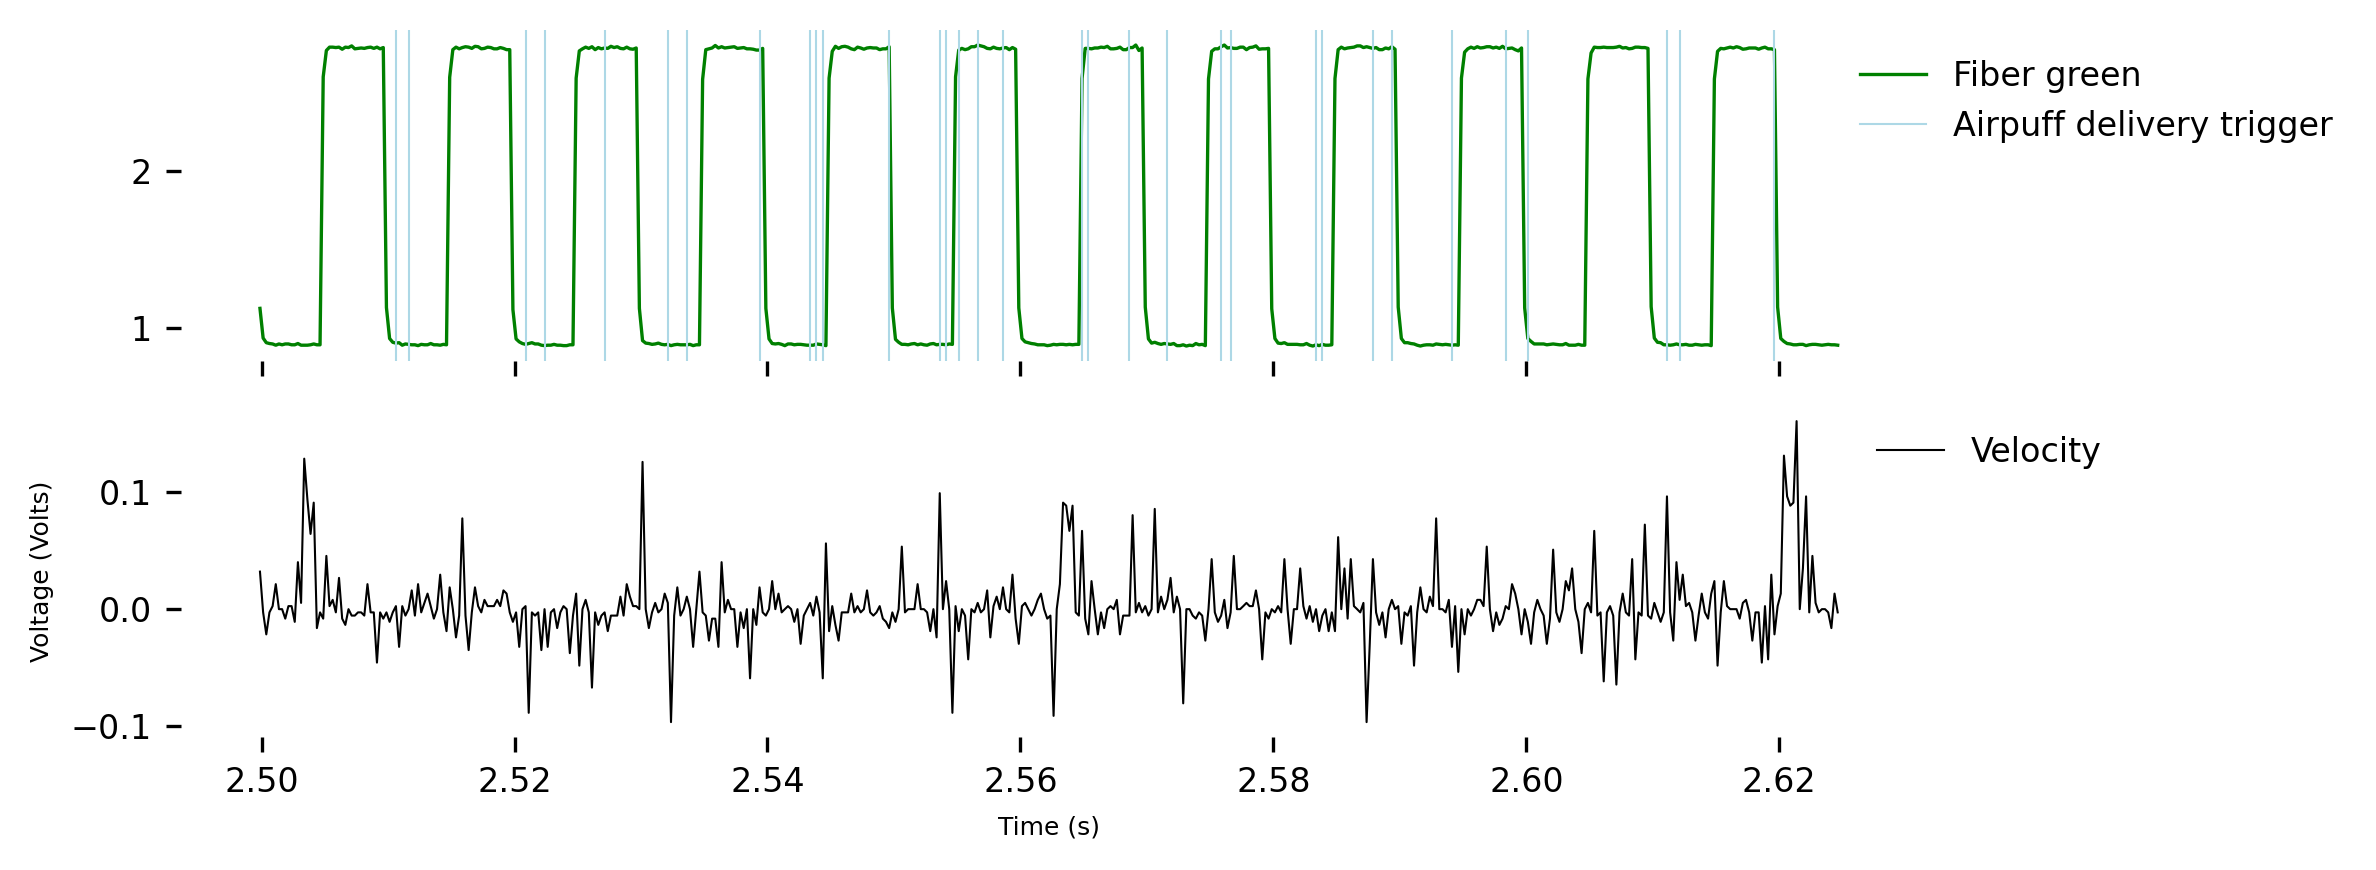

In [90]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_green.data[10000:10500]
timestamps = fluorescence_green.get_timestamps()[10000:10500]

velocity_data = velocity_picoscope.data[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.62)]["timestamp"]

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(8, 3), dpi=300, sharex=True)

ax[0].plot(timestamps, data, color="green", linewidth=0.8)
[ax[0].axvline(time, color='lightblue', linewidth=0.5) for time in event_times]

ax[1].plot(timestamps, velocity_data, color="black", linewidth=0.5)

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Fiber green", "Airpuff delivery trigger"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Velocity"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

plt.xlabel('Time (s)', fontsize=6)
plt.ylabel('Voltage (Volts)', fontsize=6)
plt.tick_params(axis='x', labelsize=8)


plt.tight_layout()
plt.show()

The 405 nm and 470 nm illumination onset times are added to the `TtlsTable`.

In [22]:
ttl_times = nwbfile.acquisition["TtlsTable"][:]
ttl_times

,timestamp,ttl_type,duration
id,,,
0,0.004750,0,0.005
103034,0.009750,1,0.005
1,0.014749,0,0.005
103035,0.019749,1,0.005
2,0.024749,0,0.005
...,...,...,...
103031,1030.081232,0,0.005
206065,1030.086232,1,0.005
103032,1030.091231,0,0.005


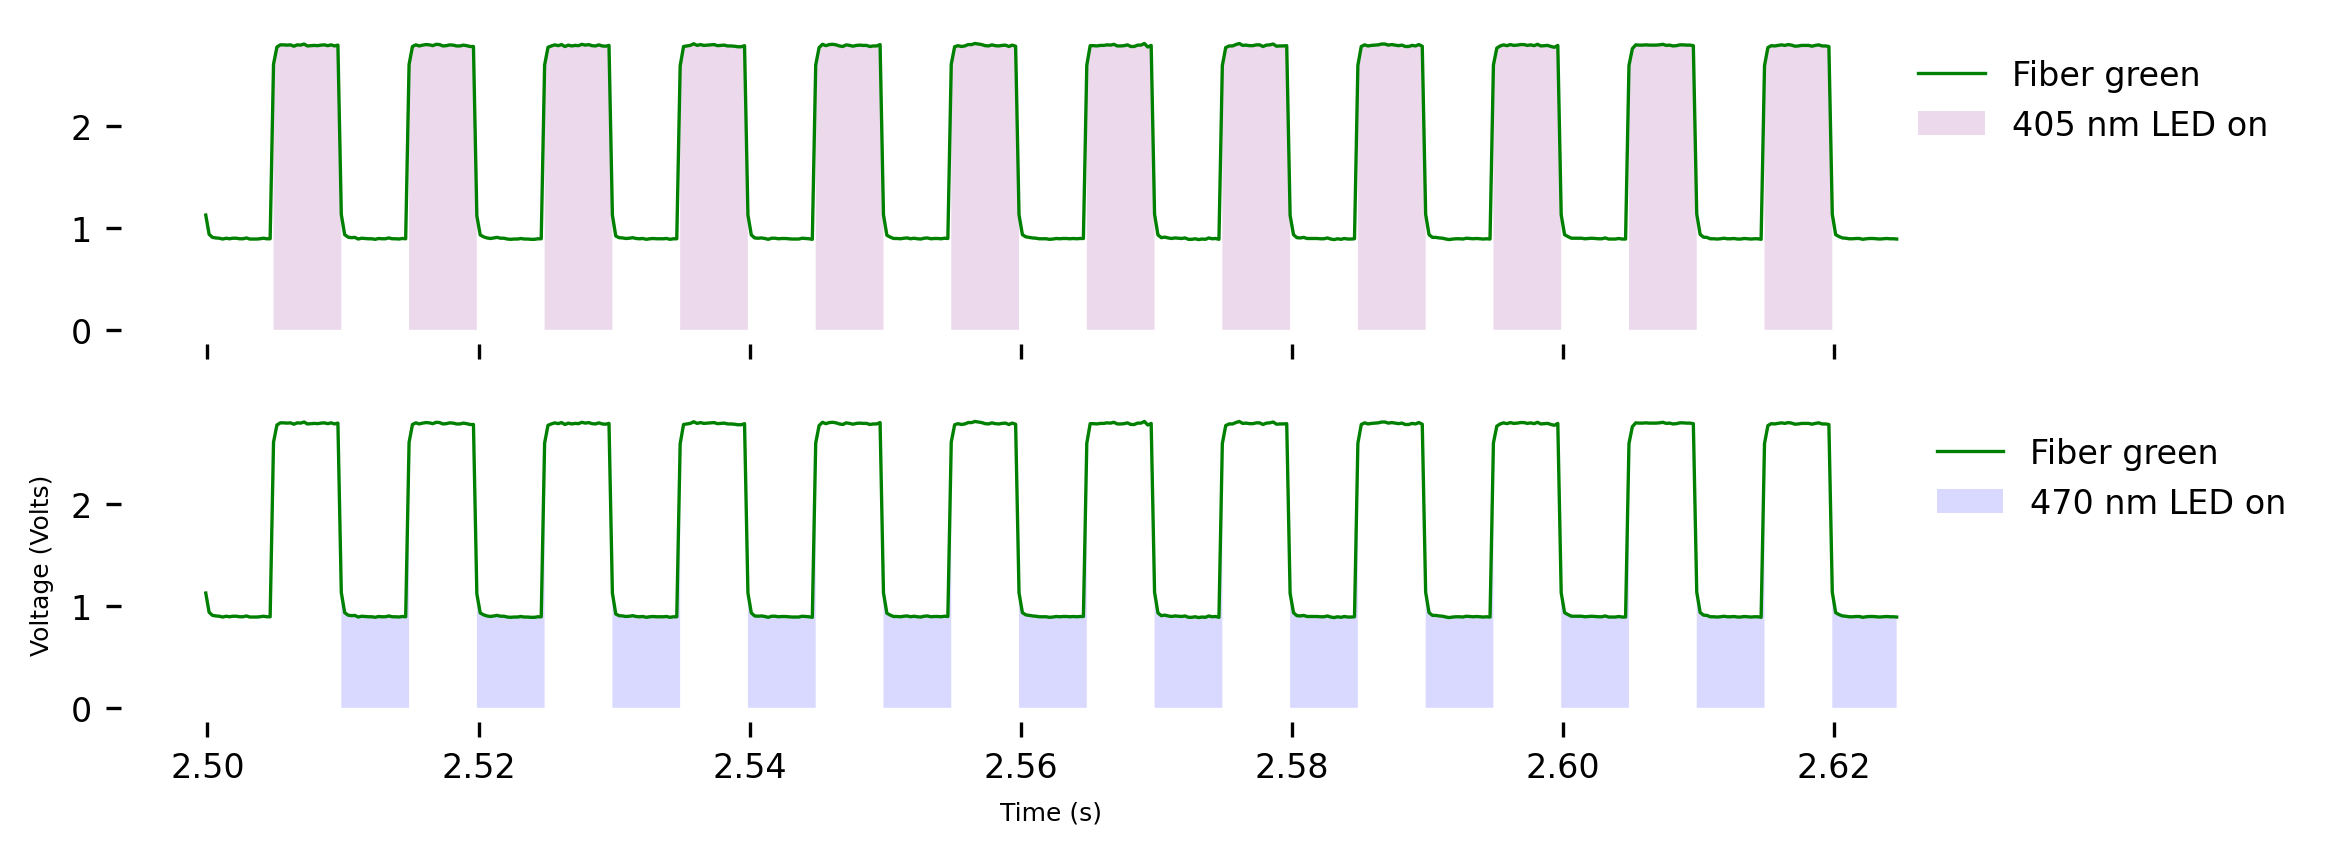

In [91]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_green.data[10000:10500]
timestamps = fluorescence_green.get_timestamps()[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.6)]["timestamp"]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

ax[0].plot(timestamps, data, color="green", linewidth=0.8)

ttl_0 = ttl_times[ttl_times["ttl_type"] == 0]
violet_illumination_times = ttl_0[(ttl_0["timestamp"] > 2.5 ) & (ttl_0["timestamp"] <= 2.62)]
for illumination_onset in violet_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    ax[0].fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='purple', edgecolor='none', alpha=0.15)

ax[1].plot(timestamps, data, color="green", linewidth=0.8)

ttl_1 = ttl_times[ttl_times["ttl_type"] == 1]
blue_illumination_times = ttl_1[(ttl_1["timestamp"] > 2.5 ) & (ttl_1["timestamp"] <= 2.62)]
for illumination_onset in blue_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    ax[1].fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='blue', edgecolor='none', alpha=0.15)

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Fiber green", "405 nm LED on"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Fiber green", "470 nm LED on"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

plt.xlabel('Time (s)', fontsize=6)
plt.ylabel('Voltage (Volts)', fontsize=6)
plt.tick_params(axis='x', labelsize=8)
plt.show()

## Fiber photometry traces

The fluorescence signals from the Picoscope were separated due to 405 vs 470 nm illumination (405 nm is GCaMP's isosbestic point and thus serves as a movement control) and were re-binned from 4000 Hz to 100 Hz.

The fluorescence traces are added to `nwbfile.acquisition` and are stored in a `FiberPhotometryResponseSeries` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry). 
The fluorescence data during 470 nm excitation collected from Fiber 1 can be accessed as `nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"]`. 

In [26]:
fiber_photometry_response_series = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"]
fiber_photometry_response_series

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,
0,TS,GCaMP6f abc.Indicator at 0x6067036496\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13080446736\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x6067597136\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x13080439440\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13091510480\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13143015760\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x6067587280\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,TS,GCaMP6f abc.Indicator at 0x6067036496\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13080446736\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x6067596496\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x13080439440\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13091510480\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13143015760\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n m

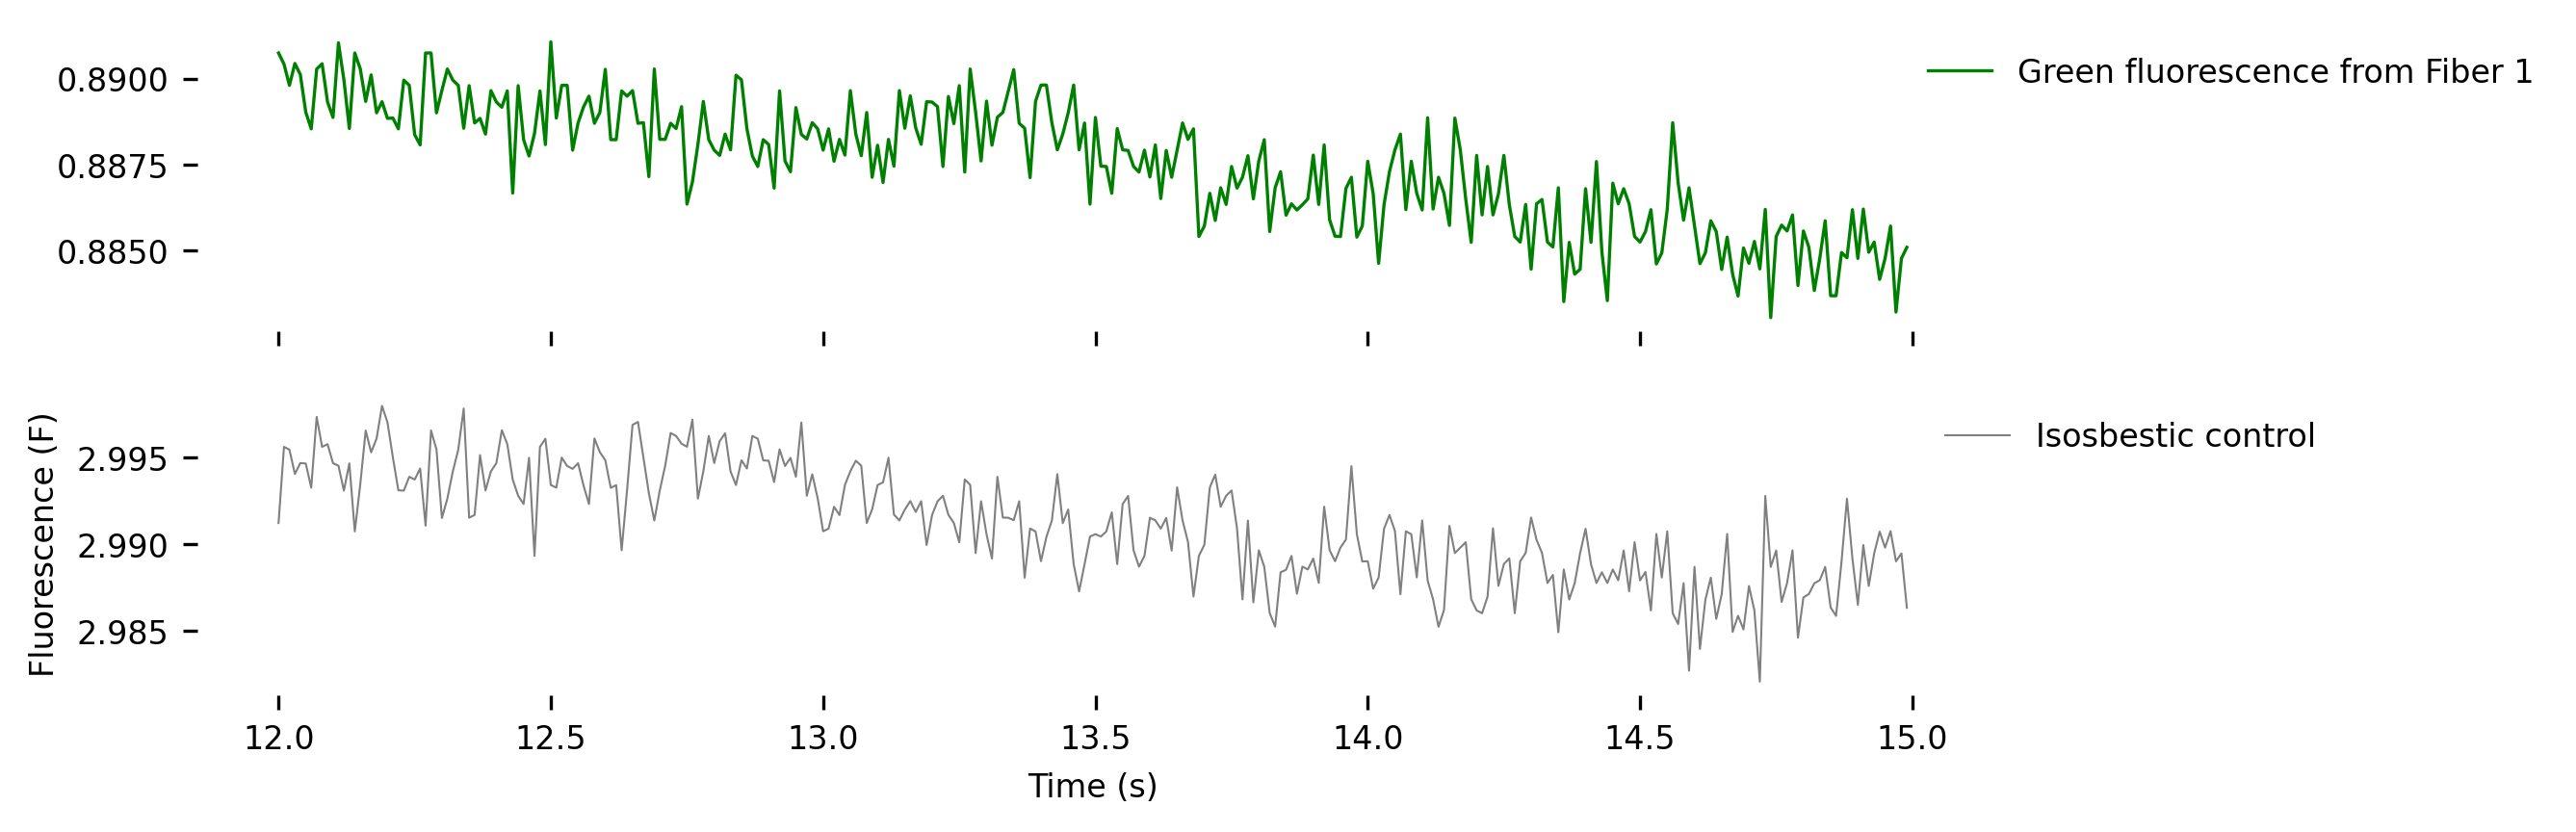

In [66]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fiber_photometry_response_series.data[1200:1500]
timestamps = fiber_photometry_response_series.get_timestamps()[1200:1500]

control_signal = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenIsosbesticFiber1"]
control_data = control_signal.data[1200:1500]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

# Plot data
ax[0].plot(timestamps, data, color="green", linewidth=0.8, label='Data')

# Plot control data with offset
ax[1].plot(timestamps, control_data, color="grey", linewidth=0.5, label='Control Data (shifted)')

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Green fluorescence from Fiber 1"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Isosbestic control"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


plt.xlabel('Time (s)', fontsize=8)
plt.ylabel('Fluorescence (F)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()


## Fiber photometry metadata

The fiber photometry metadata includes the type of indicator(s), optical fiber(s), excitation source(s), photodector(s), dichroic mirror(s), and optical filter(s) that were used to construct a single fluorescence signal.

The metadata is stored in a `FiberPhotometryTable` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry) and is added to `nwbfile.lab_meta_data`. It can be accessed as `nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table`.

In [67]:
nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table[:]

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,
0,DS,GCaMP6f abc.Indicator at 0x13150935376\nFields...,Fiber1 abc.OpticalFiber at 0x13400296592\nFiel...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x131512...,DichroicMirrorGreen abc.DichroicMirror at 0x13...,2.4,"[2.4752432416813375, -0.58, 3.1111606942305987]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x13...
1,DS,GCaMP6f abc.Indicator at 0x13150935376\nFields...,Fiber1 abc.OpticalFiber at 0x13400296592\nFiel...,ExcitationSource405 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x131512...,DichroicMirrorGreen abc.DichroicMirror at 0x13...,2.4,"[2.4752432416813375, -0.58, 3.1111606942305987]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter405 abc.BandOpticalFilter at 0x13...
2,TS,GCaMP6f abc.Indicator at 0x13150935376\nFields...,Fiber2 abc.OpticalFiber at 0x13400307536\nFiel...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x131512...,DichroicMirrorGreen abc.DichroicMirror at 0x13...,2.4,"[2.4752432416813375, -0.58, 3.1111606942305987]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x13...
3,TS,GCaMP6f abc.Indicator at 0x13150935376\nFields...,Fiber2 abc.OpticalFiber at 0x13400307536\nFiel...,ExcitationSource405 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x131512...,DichroicMirrorGreen abc.DichroicMirror at 0x13...,2.4,"[2.4752432416813375, -0.58, 3.1111606942305987]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter405 abc.BandOpticalFilter at 0x13...


The `fiber_photometry_table_region` attribute in the `FiberPhotometryResponseSeries` object references row(s) of this table:

In [32]:
fiber_photometry_table_region = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"].fiber_photometry_table_region[:]
fiber_photometry_table_region

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,
0,TS,GCaMP6f abc.Indicator at 0x6067036496\nFields:...,Fiber1 abc.OpticalFiber at 0x13080446736\nFiel...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x130804...,DichroicMirrorGreen abc.DichroicMirror at 0x13...,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x60...


The metadata on the optical fiber used to record the GCaMP fluorescence is added to `nwbfile.devices` and can be acessed as `nwbfile.devices["Fiber1"]` or can be accessed from the referenced optical fiber in the `fiber_photometry_table_region` of the `FiberPhotometryResponseSeries`.

In [33]:
fiber_photometry_table_region["optical_fiber"][0]

Fiber1 abc.OpticalFiber at 0x13080446736
Fields:
  core_diameter_in_um: 200.0
  description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.
  manufacturer: Doric
  model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF
  numerical_aperture: 0.57

In [34]:
fiber_photometry_table_region["indicator"][0]

GCaMP6f abc.Indicator at 0x6067036496
Fields:
  injection_coordinates_in_mm: [-3.25  1.55 -3.8 ]
  injection_location: SNc
  label: AAV-GCaMP6f

In [35]:
fiber_photometry_table_region["excitation_source"][0]

ExcitationSource470 abc.ExcitationSource at 0x6067597136
Fields:
  description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)
were coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.
Then, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,
each filtered with a corresponding filter.

  excitation_wavelength_in_nm: 470.0
  illumination_type: LED
  manufacturer: Thorlabs
  model: M70F3

In [36]:
fiber_photometry_table_region["photodetector"][0]

PhotodetectorPMT abc.Photodetector at 0x13080439440
Fields:
  description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).
  detected_wavelength_in_nm: 520.0
  detector_type: PMT
  manufacturer: Hamamatsu Photonics
  model: H10770PA-40

In [37]:
fiber_photometry_table_region["dichroic_mirror"][0]

DichroicMirrorGreen abc.DichroicMirror at 0x13091510480
Fields:
  cut_on_wavelength_in_nm: 505.0
  description: The dichroic mirror used to separate green fluorescence from the excitation light.
  manufacturer: Chroma Tech Corp
  model: T505lpxr
  transmission_band_in_nm: [505. 750.]

In [38]:
fiber_photometry_table_region["emission_filter"][0]

EmissionFilterGreen abc.BandOpticalFilter at 0x13143015760
Fields:
  bandwidth_in_nm: 50.0
  center_wavelength_in_nm: 540.0
  description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.
  filter_type: Bandpass
  manufacturer: Semrock
  model: FF01-540/50-25

In [39]:
fiber_photometry_table_region["excitation_filter"][0]

OpticalFilter470 abc.BandOpticalFilter at 0x6067587280
Fields:
  bandwidth_in_nm: 30.0
  center_wavelength_in_nm: 472.0
  description: The band-pass filter used to isolate the 470 nm excitation light.
  filter_type: Bandpass
  manufacturer: Semrock
  model: FF02-472/30-25

In [92]:
nwbfile.processing["ophys"]

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,
0,TS,GCaMP6f abc.Indicator at 0x13868909648\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13091127056\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x13867669712\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x13868825808\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13867670992\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13867670224\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x13401130448\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,TS,GCaMP6f abc.Indicator at 0x13868909648\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13091127056\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x13803813456\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x13868825808\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13867670992\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13867670224\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpas

In [94]:
df_over_f_traces = nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeriesGreenFiber1"]
df_over_f_traces

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,
0,TS,GCaMP6f abc.Indicator at 0x13868909648\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13091127056\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x13867669712\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x13868825808\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13867670992\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13867670224\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x13401130448\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,TS,GCaMP6f abc.Indicator at 0x13868909648\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x13091127056\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescencefrom the TS brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x13803813456\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x13868825808\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x13867670992\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",EmissionFilterGreen abc.BandOpticalFilter at 0x13867670224\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpas

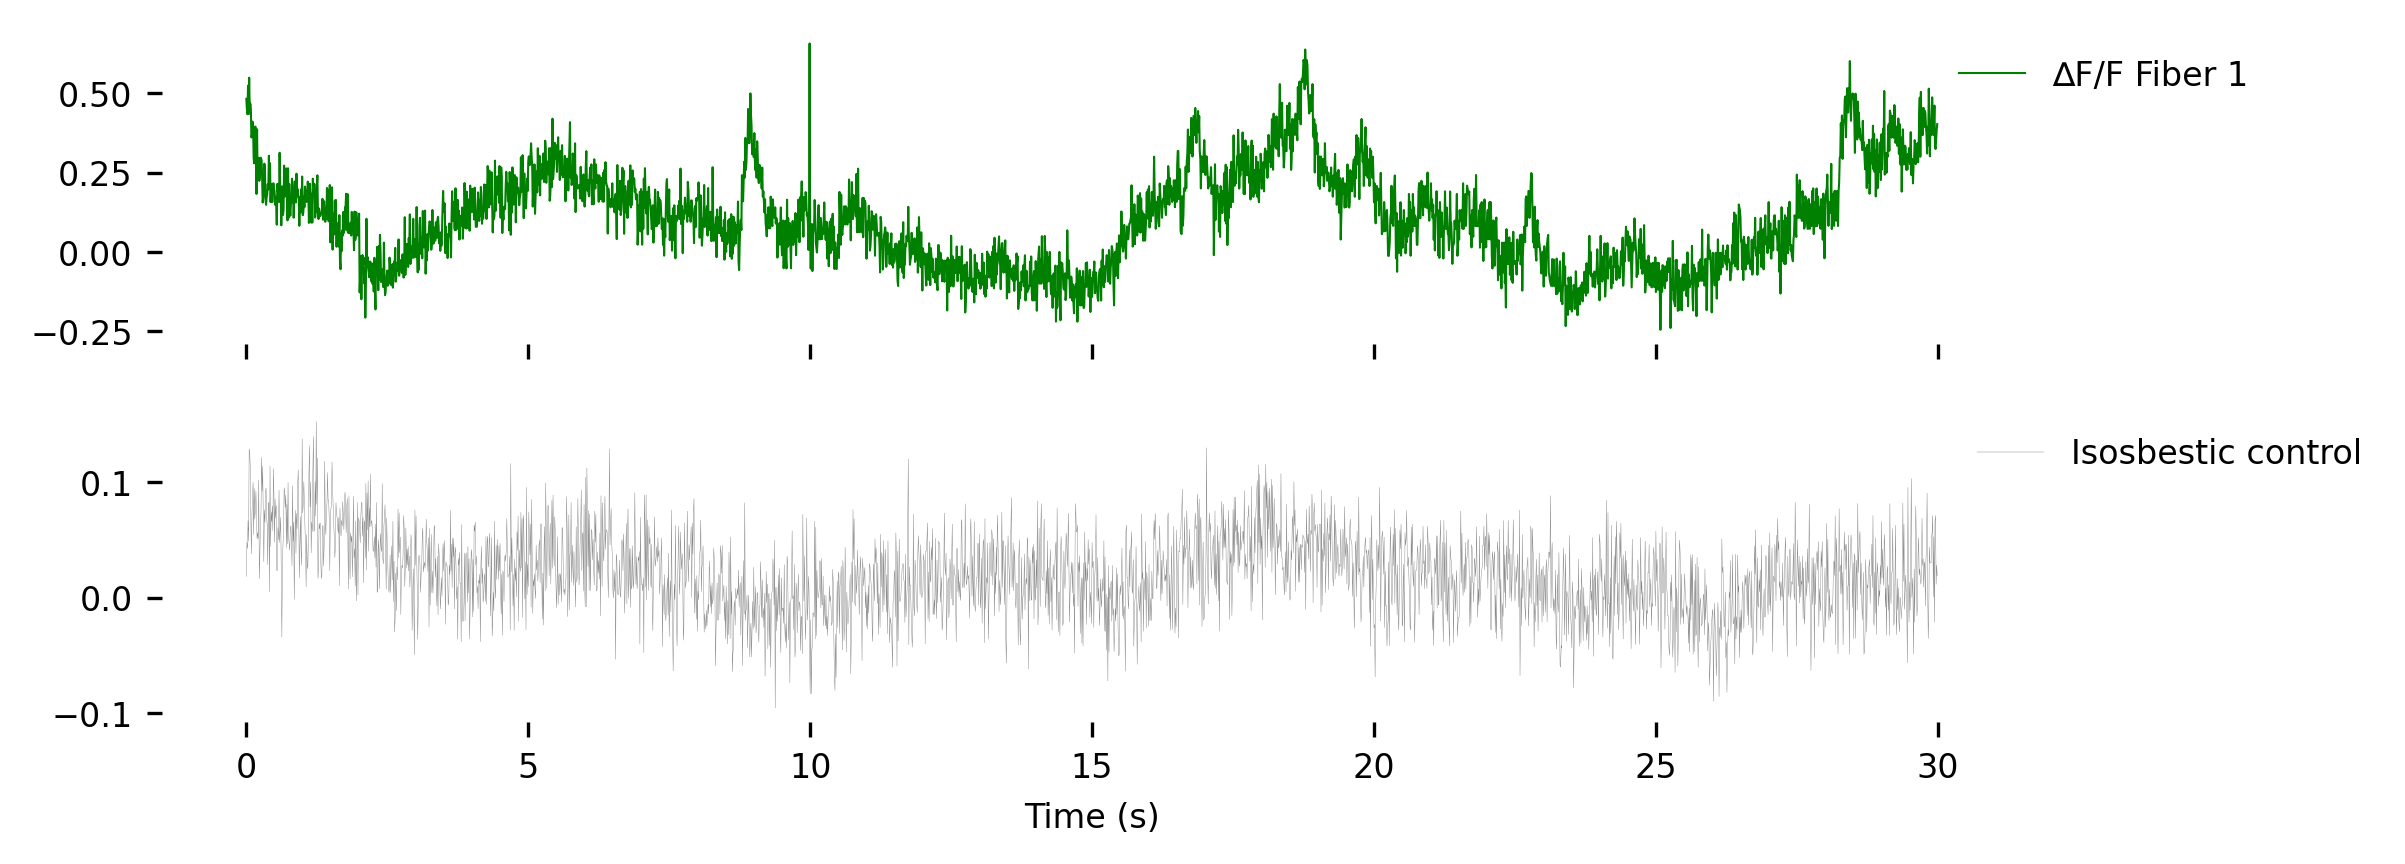

In [99]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[0:3000]
timestamps = df_over_f_traces.get_timestamps()[0:3000]

control_signal = nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeriesGreenIsosbesticFiber1"]
control_data = control_signal.data[0:3000]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

# Plot data
ax[0].plot(timestamps, data, color="green", linewidth=0.5, label='Data')

# Plot control data with offset
ax[1].plot(timestamps, control_data, color="grey", linewidth=0.1, label='Control Data (shifted)')

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["∆F/F Fiber 1"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Isosbestic control"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


plt.xlabel('Time (s)', fontsize=8)
#plt.ylabel('Fluorescence (F)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()